#### Sources
https://stmorse.github.io/journal/espn-fantasy-python.html

https://stmorse.github.io/journal/espn-fantasy-2-python.html

https://stmorse.github.io/journal/espn-fantasy-3-python.html

In [1]:
import requests
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Setup Constants
# identify the league
league_id = 272407
team_id = 7
season_id = 2018
# cookie stuff
ESPN_S2 = 'AEB8MCwqbL2YwOYOMJbCQ%2FvSMWfN6i2gKF1xbs4un0rSGOvw56jI4qJHzW8EtFAQbvrl1sptUylSwrblE4SxWu52F9sK1b%2BWoy3n8hZ0PvsTVNLVdwxzq%2FBRnOUBIrw73Vf8fMEqTjiXHoTXHhSStT0HI0DcZZuqoS%2Bi%2B0BFQARnuWpRs239t3XmDgzXHdRyBOtKfYcQXYpq%2BuvtXQ%2FfAxxt3SBMboeHlQi0uK0U0hkIT4cVCZdQ8%2FOVZDFlQk3KIY29wbJstYYILjYS8wp5iuM9'
ESPN_ATH = {"swid":"{7ADF0B7F-2028-4279-9F0B-7F20284279EC}"}
SWID = '{7ADF0B7F-2028-4279-9F0B-7F20284279EC}'

In [4]:
player_info = requests.get('http://games.espn.com/ffl/api/v2/playerInfo', 
                           params={'leagueId': league_id, 'seasonId': season_id, 'matchupPeriodId': 1},
                           cookies={'swid': SWID, 'espn_s2': ESPN_S2})

In [5]:
player_info.url

'http://games.espn.com/ffl/api/v2/playerInfo?leagueId=272407&seasonId=2018&matchupPeriodId=1'

In [6]:
player_info = player_info.json()['playerInfo']

In [7]:
player_info

{'players': [{'isQueuedWaiverLocked': False,
   'isTradeLocked': False,
   'keeper': False,
   'lockStatus': 3,
   'player': {'defaultPositionId': 2,
    'draftRank': 1.4,
    'droppable': False,
    'eligibleSlotCategoryIds': [2, 23, 20],
    'firstName': 'Todd',
    'gameStarterStatus': -2147483648,
    'healthStatus': 0,
    'isActive': True,
    'isIREligible': False,
    'jersey': '30',
    'lastName': 'Gurley II',
    'lastNewsDate': '2018-11-29T01:07:28.000Z',
    'lastVideoDate': '2017-12-31T15:21:49.853Z',
    'percentChange': 0.00437,
    'percentOwned': 99.96916,
    'percentStarted': 76.62026,
    'playerId': 17683,
    'proTeamId': 14,
    'sportsId': 2977644,
    'tickerId': 2977644,
    'universeId': 2,
    'value': -1},
   'rosterStatus': 1,
   'team': {'division': {'divisionId': 0, 'divisionName': 'East', 'size': 5},
    'logoType': 'vector',
    'logoUrl': 'http://g.espncdn.com/lm-static/logo-packs/ffl/CoachGruden-ChipWass/gruden-15.svg',
    'teamAbbrev': 'dumb',
   

In [8]:
score_boards = {}
box_scores = {}

for week in range(1,17):   
    score_board = requests.get('http://games.espn.com/ffl/api/v2/scoreboard', 
                               params={'leagueId': league_id, 'seasonId': season_id,
                                       'matchupPeriodId': week},
                               cookies={'swid': SWID, 'espn_s2': ESPN_S2}).json()
    score_boards[week] = score_board
    box_scores[week] = {}
    
    # loop through matchups that week
    for match in range(len(score_board['scoreboard']['matchups'])):
        home_id = score_board['scoreboard']['matchups'][match]['teams'][0]['team']['teamId']
        
        box_score = requests.get('http://games.espn.com/ffl/api/v2/boxscore', 
                                 params={'leagueId': league_id, 'seasonId': season_id,
                                         'teamId': home_id, 'matchupPeriodId': week},
                                 cookies={'swid': SWID, 'espn_s2': ESPN_S2}).json()
        # dont need meta data, can just use 'boxscore'
        box_scores[week][match] = box_score['boxscore']

In [9]:
len(score_boards[1]['scoreboard']['matchups'])

5

In [10]:
score_boards[1]['scoreboard']['matchups'][0].keys()

dict_keys(['winner', 'teams', 'bye'])

In [11]:
score_boards[1]['scoreboard']['matchups'][0]

{'bye': False,
 'teams': [{'home': True,
   'playerIDs': [17683,
    17929,
    12514,
    14881,
    13232,
    60030,
    17668,
    16040,
    14993,
    14922,
    15966,
    17810,
    18395,
    15920,
    16804,
    18168,
    60003],
   'score': 133.4,
   'team': {'division': {'divisionId': 0, 'divisionName': 'East', 'size': 5},
    'logoType': 'vector',
    'logoUrl': 'http://g.espncdn.com/lm-static/logo-packs/ffl/CoachGruden-ChipWass/gruden-15.svg',
    'record': {'awayLosses': 3,
     'awayPercentage': 0,
     'awayTies': 0,
     'awayWins': 2,
     'divisionLosses': 4,
     'divisionPercentage': 0.33333,
     'divisionStanding': 5,
     'divisionTies': 0,
     'divisionWins': 2,
     'homeLosses': 6,
     'homePercentage': 0,
     'homeTies': 0,
     'homeWins': 1,
     'overallLosses': 9,
     'overallPercentage': 0.25,
     'overallStanding': 9,
     'overallTies': 0,
     'overallWins': 3,
     'pointsAgainst': 1593.5,
     'pointsFor': 1445.9,
     'streakLength': 1,
  

In [12]:
# week 1 match 0
box_scores[1][0].keys()

dict_keys(['scheduleItems', 'teams', 'matchupPeriodId', 'scoringPeriodId', 'allScoringPeriodsInMatchupPeriod', 'progames', 'homeTeamBonus'])

In [13]:
box_scores[1][0]['scheduleItems']

[{'matchupPeriodId': 1,
  'matchups': [{'awayTeam': {'division': {'divisionId': 1,
      'divisionName': 'West',
      'size': 5},
     'logoType': 'vector',
     'logoUrl': 'http://g.espncdn.com/s/ffllm/logos/SmackTalk-LeoEspinosa/u_mad_bro-09.svg',
     'teamAbbrev': 'QUIN',
     'teamId': 8,
     'teamLocation': 'Charlottesville',
     'teamNickname': 'Challengers',
     'waiverRank': 1},
    'awayTeamAdjustment': 0,
    'awayTeamId': 8,
    'awayTeamScores': [139.8],
    'homeTeam': {'division': {'divisionId': 0,
      'divisionName': 'East',
      'size': 5},
     'logoType': 'vector',
     'logoUrl': 'http://g.espncdn.com/lm-static/logo-packs/ffl/CoachGruden-ChipWass/gruden-15.svg',
     'teamAbbrev': 'dumb',
     'teamId': 5,
     'teamLocation': 'Domestic',
     'teamNickname': 'Violins',
     'waiverRank': 2},
    'homeTeamAdjustment': 0,
    'homeTeamBonus': 0,
    'homeTeamId': 5,
    'homeTeamScores': [133.4],
    'isBye': False,
    'matchupTypeId': 0,
    'outcome': 2}]}]

In [14]:
len(box_scores[1][0]['teams'])

2

In [15]:
box_scores[1][0]['teams'][0].keys()

dict_keys(['appliedActiveRealTotal', 'appliedInactiveRealTotal', 'slots', 'teamId', 'appliedActiveProjectedTotal', 'team', 'appliedInactiveProjectedTotal'])

In [16]:
box_scores[1][0]['teams'][0]

{'appliedActiveProjectedTotal': 111.6,
 'appliedActiveRealTotal': 133.4,
 'appliedInactiveProjectedTotal': 59.5,
 'appliedInactiveRealTotal': 69.3,
 'slots': [{'currentPeriodProjectedStats': {'appliedStatTotal': 16,
    'appliedStats': {'19': 0.1,
     '20': -1.2,
     '24': 2.9,
     '25': 0.9,
     '26': 0,
     '4': 5.8,
     '63': 0,
     '72': -0.6,
     '8': 8},
    'rawStats': {'0': 30.54477,
     '1': 18.93006,
     '10': 2,
     '11': 3,
     '12': 1,
     '13': 2,
     '14': 1,
     '15': 0.16335,
     '16': 0.10675,
     '17': 0.13589,
     '18': 0.01836,
     '19': 0.06952,
     '2': 11.61471,
     '20': 0.5958,
     '21': 0.61975,
     '22': 217.84802,
     '23': 5.75456,
     '24': 28.70874,
     '25': 0.15529,
     '26': 0.00584,
     '27': 5,
     '28': 2,
     '29': 1,
     '3': 217.84802,
     '30': 1,
     '33': 1,
     '35': 0.01112,
     '36': 0.00778,
     '37': 0.03594,
     '38': 0.00123,
     '39': 4.98887,
     '4': 1.44477,
     '40': 28.70874,
     '5': 43,


In [17]:
len(box_scores[1][0]['teams'][0]['slots'])

17

In [18]:
box_scores[1][0]['teams'][0]['slots'][0].keys()

dict_keys(['currentPeriodRealStats', 'lockStatus', 'currentPeriodProjectedStats', 'proGameIds', 'opponentProTeamId', 'isQueuedWaiverLocked', 'isTradeLocked', 'watchList', 'pvoRank', 'slotCategoryId', 'player'])

In [19]:
box_scores[1][0]['teams'][0]['slots'][0]

{'currentPeriodProjectedStats': {'appliedStatTotal': 16,
  'appliedStats': {'19': 0.1,
   '20': -1.2,
   '24': 2.9,
   '25': 0.9,
   '26': 0,
   '4': 5.8,
   '63': 0,
   '72': -0.6,
   '8': 8},
  'rawStats': {'0': 30.54477,
   '1': 18.93006,
   '10': 2,
   '11': 3,
   '12': 1,
   '13': 2,
   '14': 1,
   '15': 0.16335,
   '16': 0.10675,
   '17': 0.13589,
   '18': 0.01836,
   '19': 0.06952,
   '2': 11.61471,
   '20': 0.5958,
   '21': 0.61975,
   '22': 217.84802,
   '23': 5.75456,
   '24': 28.70874,
   '25': 0.15529,
   '26': 0.00584,
   '27': 5,
   '28': 2,
   '29': 1,
   '3': 217.84802,
   '30': 1,
   '33': 1,
   '35': 0.01112,
   '36': 0.00778,
   '37': 0.03594,
   '38': 0.00123,
   '39': 4.98887,
   '4': 1.44477,
   '40': 28.70874,
   '5': 43,
   '6': 21,
   '62': 0.07536,
   '63': 0.00235,
   '64': 2.77354,
   '65': 0.51046,
   '66': 0.08816,
   '68': 0.59862,
   '69': 0.24502,
   '7': 10,
   '70': 0.04056,
   '72': 0.28558,
   '73': 0.88138,
   '8': 8,
   '9': 4}},
 'currentPeriodRe

In [20]:
# this identifies the positions (i.e. 0 = QB)
[slot['slotCategoryId'] for slot in box_scores[1][0]['teams'][0]['slots']]

[0, 2, 2, 4, 4, 6, 23, 23, 16, 17, 20, 20, 20, 20, 20, 20, 20]

Should build dataframe (for the purpose of showing season performance) with columns:

team, week, opponent, point_total, slot_id, slot_category, slot_point_total, player, player_position

In [21]:
data = []
for week, week_scores in box_scores.items():
    matchups = [ws['scheduleItems'][0]['matchups'] for ws in week_scores.values()]
    team_scores = [t for ws in week_scores.values() for t in ws['teams']]
    for team_score in team_scores:
        team_id = team_score['teamId']
        team_point_total = team_score['appliedActiveRealTotal']
        slot_index = 0
        for slot in team_score['slots']:
            slot_data = [team_id, week, team_point_total, slot_index, slot['slotCategoryId']]
            if 'currentPeriodRealStats' in slot.keys() and 'appliedStatTotal' in slot['currentPeriodRealStats'].keys():
                slot_data.append(slot['currentPeriodRealStats']['appliedStatTotal'])
            else:
                slot_data.append(0)
            if 'player' in slot.keys():
                slot_data.append(slot['player']['firstName'] + ' ' + slot['player']['lastName'])
                slot_data.append(slot['player']['defaultPositionId'])
            else:
                slot_data += [np.nan, np.nan]

            slot_df = pd.DataFrame([slot_data], columns=['team_id', 'week', 'team_point_total',
                                                         'slot_index', 'slot_category', 'slot_point_total',
                                                         'player_name', 'player_position'])
            data.append(slot_df)
            slot_index += 1
score_df = pd.concat(data, axis=0)

In [22]:
score_df

,team_id,week,team_point_total,slot_index,slot_category,slot_point_total,player_name,player_position
0,5,1,133.4,0,0,19.5,Russell Wilson,1.0
0,5,1,133.4,1,2,22.2,Todd Gurley II,2.0
0,5,1,133.4,2,2,2.6,LeSean McCoy,2.0
0,5,1,133.4,3,4,38.8,Tyreek Hill,3.0
0,5,1,133.4,4,4,8.9,Nelson Agholor,3.0
0,5,1,133.4,5,6,1.8,Jimmy Graham,4.0
0,5,1,133.4,6,23,3.8,Mohamed Sanu,3.0
0,5,1,133.4,7,23,6.8,John Ross,3.0
0,5,1,133.4,8,16,13.0,Jaguars D/ST,16.0
0,5,1,133.4,9,17,16.0,Greg Zuerlein,5.0


In [23]:
# mean score by position
score_df.groupby(['team_id', 'player_position']).slot_point_total.mean()

team_id  player_position
1        1.0                16.603846
         2.0                 8.914141
         3.0                 8.709434
         4.0                11.406667
         5.0                 8.642857
         16.0                4.923077
2        1.0                17.903448
         2.0                11.321875
         3.0                 9.184416
         4.0                 6.656000
         5.0                 7.769231
         16.0                3.615385
3        1.0                16.123810
         2.0                 7.829577
         3.0                 9.840385
         4.0                 7.045833
         5.0                 7.125000
         16.0                8.687500
4        1.0                14.547059
         2.0                 7.766667
         3.0                 9.339706
         4.0                 5.534286
         5.0                 7.500000
         16.0                4.937500
5        1.0                16.195000
         2.0             

In [24]:
# for only starters
starter_scores = score_df[score_df.slot_index <= 10]
position_means = starter_scores.groupby('player_position').slot_point_total.mean().reset_index().rename(
    columns={'slot_point_total':'mean_position_point_total'})

In [25]:
position_means

,player_position,mean_position_point_total
0,1.0,18.354422
1,2.0,11.071655
2,3.0,11.171296
3,4.0,8.474306
4,5.0,7.092308
5,16.0,6.118519


In [26]:
team_position_means = starter_scores.groupby(
    ['team_id', 'player_position']).slot_point_total.mean().reset_index()

In [27]:
team_position_means

,team_id,player_position,slot_point_total
0,1,1.0,22.107692
1,1,2.0,11.791667
2,1,3.0,11.866667
3,1,4.0,12.221429
4,1,5.0,9.307692
5,1,16.0,4.923077
6,2,1.0,20.215385
7,2,2.0,13.184091
8,2,3.0,11.427660
9,2,4.0,6.915385


In [28]:
merged = pd.merge(team_position_means, position_means, on='player_position')

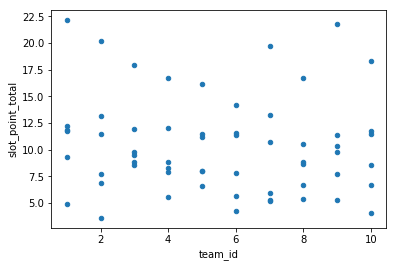

In [29]:
merged.plot(kind='scatter', x='team_id', y='slot_point_total', )

In [30]:
points_per_player = score_df.groupby(['team_id', 'player_name']).slot_point_total.sum()
points_per_player.groupby('team_id').apply(lambda x: x.sort_values(ascending=False).head(7))

team_id  team_id  player_name        
1        1        Drew Brees             253.0
                  Melvin Gordon          229.5
                  Julio Jones            187.7
                  Travis Kelce           166.9
                  Aaron Jones            126.3
                  Wil Lutz               121.0
                  Cooper Kupp            115.1
2        2        Matt Ryan              248.7
                  Andrew Luck            234.5
                  Michael Thomas         195.0
                  Todd Gurley II         177.2
                  Adrian Peterson        139.5
                  Tevin Coleman          133.9
                  A.J. Green             125.2
3        3        Ben Roethlisberger     243.8
                  James Conner           220.7
                  Philip Rivers          214.9
                  Adam Thielen           210.3
                  Keenan Allen           148.8
                  Phillip Lindsay        133.5
                  T.J.